<a href="https://colab.research.google.com/github/sagar2582/TensorFlow/blob/main/02_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification with TensorFlow

## Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


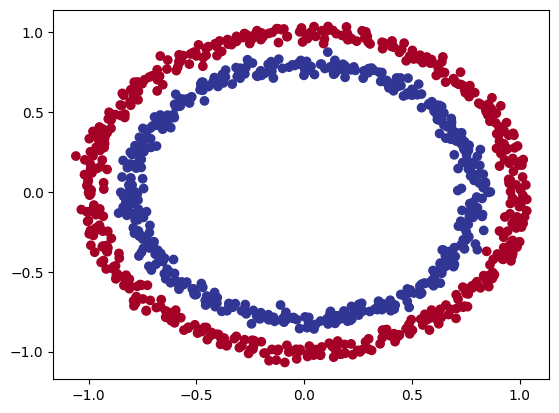

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
## Input and output shapes of our neural networks
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [ ]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.5988 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.0225 - accuracy: 0.4890
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9740 - accuracy: 0.4630
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8606 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7169 - accuracy: 0.5000


In [ ]:
# improving our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Adding an extra layer


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932836174964905, 0.5]

## Improving our model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5050


[0.6963784098625183, 0.5049999952316284]

### Let's create a function to visualize our model.

In [ ]:
from numpy.core.fromnumeric import shape
import numpy as np

def plot_decision_boundry(model, X, y):
  '''
  Plots the decision boundary created by a model predicting on X.
  '''
  # Define the  axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
               
  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predcitions to get them ready for plotting 
    y_pred = np.argsmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


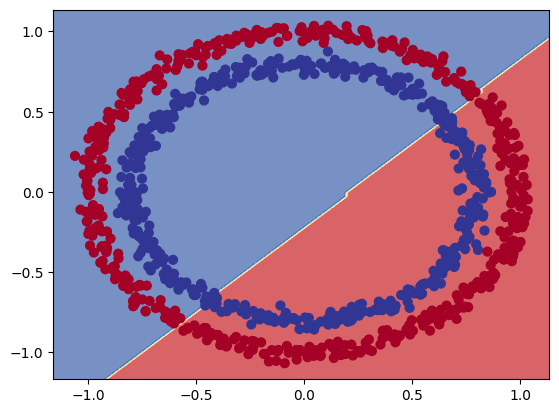

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundry(model=model_3,
                      X=X,
                      y=y)

In [ ]:
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

## The missing piece : Non-linearity

In [19]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 5ms/step - loss: 4.4158 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3835 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3656 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3335 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2876 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2760 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2469 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1971 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1374 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0790 - accuracy: 0.4740
Epoch 11/